In [7]:
# ## On Average Takes around 12 minutes 
import os

!sudo apt -qq install file
!wget https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py
!python2 fslinstaller.py
 
fslpath = "/usr/local/fsl"
os.environ["FSLDIR"] = fslpath
os.environ["PATH"] += os.pathsep + os.path.join(fslpath, 'bin')
!. ${FSLDIR}/etc/fslconf/fsl.sh

!flirt -version 

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libmagic-mgc libmagic1
The following NEW packages will be installed:
  file libmagic-mgc libmagic1
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 275 kB of archives.
After this operation, 5,297 kB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libmagic-mgc.
(Reading database ... 155653 files an

In [ ]:
## Takes a bit time to read the kaggle . json file 
!pip install kaggle --upgrade
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!mkdir content/data
!kaggle datasets download -d lyfeisgood/something
!unzip /content/something.zip -d data
!pip install regtricks
!pip install torchsummary

In [4]:
import os
import re
import nibabel as nib
import numpy as np
import torch
print(torch.__version__)
print(torch.cuda.is_available())
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
import torch
import regtricks
## Import my .py file ....... 
import Data_Loader as dl
import Models as model
import regtricks as rt

from torchsummary import summary

1.12.0+cu113
False
1.12.0+cu113
False
cpu
1.12.0+cu113
False


In [8]:
## Take around 5 minutes
## Defining the path of the data 
x,y = dl.data_loader('/content/data','/content/data',device)

## Printing the shape of specifid data
print('\nShape of MRI images - >');     dl.print_data_shape(x); 
print('\nShape of ASL images - >');     dl.print_data_shape(y);

## Printing the Stats of the data
print('\nStats for MRI data(X) - >');   dl.tensor_stats(x); 
print('\nStats for ASL data(X) - >');   dl.tensor_stats(y);

## Printing the Dimension of X and Y  
## Dimension refer -> Number x Length x Breadth x Height x Channel
print('\nDimensions of X(MRI Data) ->',end=' '); dl.print_data_dimension(x)
print('\nDimensions of Y(ASL Data) ->',end=' '); dl.print_data_dimension(y)


Shape of MRI images - >
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])

Shape of ASL images - >
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])

Stats for MRI data(X) - >
tensor(63041.9297) tensor(0.) tensor(0.0698) tensor(0.1217)
tensor(69193.1016) tensor(0.) tensor(0.0767) tensor(0.1362)
tensor(67808.2734) tensor(0.) tensor(0.0751) tensor(0.1417)
tensor(75418.3359) tensor(0.) tensor(0.0836) tensor(0.1490)
tensor(57976.9219) tensor(0.) tensor(0.0642) tensor(0.1260)
tensor(95745.1406) tensor(0.) tensor(0.1061

50688

In [9]:
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, LazyConv3d , MaxPool3d, Module, Softmax, BatchNorm3d, Dropout, Conv3d, MSELoss,functional 
from torch.optim import Adam, SGD
from torchsummary import summary as tfsum 
from tqdm import tqdm
torch.cuda.empty_cache()
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True
hidden = lambda c_in, c_out: Sequential(
    Conv3d(c_in, c_out, (3,3,2), padding=(1,1,1)),
    BatchNorm3d(c_out),
    ReLU(),
    MaxPool3d(1)
    )
hidden_2 = lambda c_in, c_out: Sequential(
    Conv3d(c_in, c_out, (3,3,5),padding=(1,1,1)),
    BatchNorm3d(c_out),
    ReLU(),
    MaxPool3d(1)
    )
Hidden = lambda c_in, c_out: Sequential(
    Conv3d(c_in, c_out, (1,1,4)),
    BatchNorm3d(c_out),
    ReLU(),
    MaxPool3d(1)
    )
class Model_1(Module):
    '''Class for the Model to be fitted on MRI data'''
    def __init__(self, c):
        '''Intiallizing the layers of the Model'''
        super(Model_1, self).__init__();
        self.hidden1 = hidden(1,c);
        self.hidden2 = hidden(c,4*c);
        self.hidden3 = hidden(4*c,8*c);
        self.hidden4 = hidden(8*c,4*c);
        self.hidden5 = hidden(4*c, 16*c);
        self.hidden6 = hidden_2(16*c,4*c);
        self.hidden7 = Hidden(4*c,1);
    def forward(self, x):
        '''Implements the forward pass of the Network'''
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.hidden3(x)
        x = self.hidden4(x)
        x = self.hidden5(x)
        x = self.hidden6(x)
        x = self.hidden7(x)
        return x 

In [10]:
channels = 1; #3 Defining the number od channels we have for neural network
# Intializing model
torch.cuda.empty_cache()
torch.backends.cudnn.benchmark = True
model = Model_1(channels).to(device) # Intializing the model 
summary(model,(1, 91,109,91))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 2, 91, 109, 92]              38
       BatchNorm3d-2       [-1, 2, 91, 109, 92]               4
              ReLU-3       [-1, 2, 91, 109, 92]               0
         MaxPool3d-4       [-1, 2, 91, 109, 92]               0
            Conv3d-5       [-1, 4, 91, 109, 93]             148
       BatchNorm3d-6       [-1, 4, 91, 109, 93]               8
              ReLU-7       [-1, 4, 91, 109, 93]               0
         MaxPool3d-8       [-1, 4, 91, 109, 93]               0
            Conv3d-9       [-1, 8, 91, 109, 94]             584
      BatchNorm3d-10       [-1, 8, 91, 109, 94]              16
             ReLU-11       [-1, 8, 91, 109, 94]               0
        MaxPool3d-12       [-1, 8, 91, 109, 94]               0
           Conv3d-13      [-1, 16, 91, 109, 95]           2,320
      BatchNorm3d-14      [-1, 16, 91, 

In [16]:
def train(epochs,batch_size,x,y):
        '''To train the neural network and return the losses'''
        ctr = 0; train_loss = []; 
        lossFn = MSELoss(); opt = Adam(model.parameters(), lr=1e-5);
        X = x.to(device); Y = y.to(device); model.train();
        for e in tqdm(range(0, epochs)):
            batch_loss = [];
            permutation = torch.randperm(X.size()[0])
            for i in range(0,X.size()[0], batch_size):
                opt.zero_grad();
                indices = permutation[i:i+batch_size];
                batch_x, batch_y = X[indices], Y[indices];
                pred = model(batch_x) ; loss = lossFn(pred, batch_y);
                loss.backward(); opt.step();
                batch_loss.append(loss); 
            train_loss.append(batch_loss);
            if(e%10 == 0): 
                print(loss); print((torch.cuda.memory_allocated())/(1024*1024))
            #pred_tot.append(pred) , loss.append(loss); 
            ctr = ctr+1;  
            if ctr < epochs-1:
                del loss , pred
        return train_loss, pred;
train_loss,prediction = train(200,3,x,y);

  0%|          | 1/200 [00:44<2:28:11, 44.68s/it]

tensor(0.1642, grad_fn=<MseLossBackward0>)
0.0


  6%|▌         | 11/200 [07:46<2:12:55, 42.20s/it]

tensor(0.1546, grad_fn=<MseLossBackward0>)
0.0


 10%|█         | 21/200 [14:47<2:05:59, 42.23s/it]

tensor(0.1491, grad_fn=<MseLossBackward0>)
0.0


 16%|█▌        | 31/200 [21:50<1:59:09, 42.30s/it]

tensor(0.1397, grad_fn=<MseLossBackward0>)
0.0


 20%|██        | 41/200 [28:52<1:51:52, 42.22s/it]

tensor(0.1287, grad_fn=<MseLossBackward0>)
0.0


 26%|██▌       | 51/200 [35:59<1:45:44, 42.58s/it]

tensor(0.1203, grad_fn=<MseLossBackward0>)
0.0


 30%|███       | 61/200 [43:08<1:39:33, 42.97s/it]

tensor(0.1082, grad_fn=<MseLossBackward0>)
0.0


 36%|███▌      | 71/200 [50:23<1:32:57, 43.23s/it]

tensor(0.1007, grad_fn=<MseLossBackward0>)
0.0


 40%|████      | 81/200 [57:35<1:25:56, 43.33s/it]

tensor(0.1008, grad_fn=<MseLossBackward0>)
0.0


 46%|████▌     | 91/200 [1:04:54<1:22:33, 45.45s/it]

tensor(0.0743, grad_fn=<MseLossBackward0>)
0.0


 50%|█████     | 101/200 [1:12:17<1:13:13, 44.38s/it]

tensor(0.0690, grad_fn=<MseLossBackward0>)
0.0


 56%|█████▌    | 111/200 [1:19:43<1:06:25, 44.78s/it]

tensor(0.0607, grad_fn=<MseLossBackward0>)
0.0


 60%|██████    | 121/200 [1:27:09<58:25, 44.38s/it]

tensor(0.0544, grad_fn=<MseLossBackward0>)
0.0


 66%|██████▌   | 131/200 [1:34:36<51:35, 44.86s/it]

tensor(0.0516, grad_fn=<MseLossBackward0>)
0.0


 70%|███████   | 141/200 [1:42:05<43:44, 44.49s/it]

tensor(0.0478, grad_fn=<MseLossBackward0>)
0.0


 76%|███████▌  | 151/200 [1:49:32<35:56, 44.00s/it]

tensor(0.0429, grad_fn=<MseLossBackward0>)
0.0


 80%|████████  | 161/200 [1:56:50<28:42, 44.16s/it]

tensor(0.0407, grad_fn=<MseLossBackward0>)
0.0


 86%|████████▌ | 171/200 [2:04:10<21:16, 44.02s/it]

tensor(0.0412, grad_fn=<MseLossBackward0>)
0.0


 90%|█████████ | 181/200 [2:11:22<13:38, 43.07s/it]

tensor(0.0366, grad_fn=<MseLossBackward0>)
0.0


 96%|█████████▌| 191/200 [2:18:25<06:21, 42.42s/it]

tensor(0.0398, grad_fn=<MseLossBackward0>)
0.0


100%|██████████| 200/200 [2:24:53<00:00, 43.47s/it]


In [ ]:
torch.cuda.empty_cache()
# !nvidia-smi
# !sudo pkill -9 python

Tue Jul 26 12:16:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    29W /  70W |  15028MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# import regtricks as rt
# str2asl_reg=rt.flirt(src=x[0],ref=y[0])
# xD=str2asl_reg.apply_to_image(x[0],ref=y[0])

In [6]:
# def data_prep(mri_data_dict,asl_data_dict,device):
#     '''
#     Params - Dictionary of MRI Data, ASL data and the device to which the tensors are stored
#     Result - Creates tensors from the data dictionary feeded
#     '''
#     x = [] ; y = []; X = []; Y = [];
#     for k,v in mri_data_dict.items():
#         if k in asl_data_dict:
#             # Loading the MRI image from the path in the train x path 
#             mri_img_x = nib.load(v); asl_img = nib.load(asl_data_dict[k]); str2asl_reg=rt.flirt(src=mri_img_x,ref=asl_img)
#             mri_img =  str2asl_reg.apply_to_image(mri_img_x,ref=asl_img)
#             # Making it a numpy array
#             mri_vec = np.array(mri_img.dataobj)[np.newaxis,:,:,:] # Channels x Length X Breadth X Slices of Brain
#             # Min max Normalizing the image 
#             mri_vec = (mri_vec - mri_vec.min()) / (mri_vec.max() - mri_vec.min())
#             # Appending the MRI image to X 
#             x.append(torch.as_tensor(mri_vec,dtype=torch.float32));#.to(device)); 
#             ## Finding the same patient with ASL data 
#             asl_img = nib.load(asl_data_dict[k]); asl_vec = np.array(asl_img.dataobj)[np.newaxis,:,:,:]; 
#             asl_vec = (asl_vec - asl_vec.min()) / (asl_vec.max() - asl_vec.min());
#             ## Appending the image to y
#             y.append(torch.as_tensor(asl_vec,dtype=torch.float32));#.to(device))
#             X = torch.stack(x,dim=0)#.to(device);
#             Y = torch.stack(y,dim=0)#.to(device);
#     return X,Y

In [47]:
# ## Takes 4 minutes
# mri,asl = dl.create_data_dict(dl.get_mri_data('/content/data'),dl.get_asl_data('/content/data'))
# x,y = data_prep(mri,asl,device)

(1, 91, 109, 91)
<class 'numpy.ndarray'>


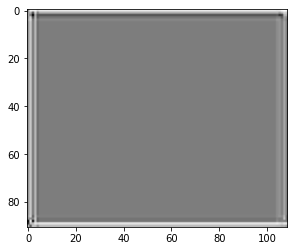

In [17]:
# dl.print_data_dimension(x); dl.print_data_dimension(y);

x_first = prediction[0]
pred_np = x_first.cpu().detach().numpy()
dl.print_data_dimension(pred_np); print(type(pred_np))

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure()
for i in range(0,x.shape[4]):
    ## For L2 Distance
    frames.append([plt.imshow(pred_np[0,:,:,i], cmap=cm.Greys_r,animated=True)])
ani = animation.ArtistAnimation(fig, frames, interval=120, blit=True, repeat_delay=1000)
ani.save('movie.mp4')


In [18]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/movie.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [12]:

#train_loss,prediction = train(2,3,train_x,train_y);



NameError: ignored